<h1>AI in Fact and Fiction - Summer 2020</h1>
<h2>PyTorch Basics</h2>

<p><a href="https://colab.research.google.com/github/AIFictionFact/AIFictionFact.github.io/blob/master/lab1.ipynb">Run this notebook on collab.</a></p>

<p>In this lab, you will learn the basics of tensor operations. Tensors are an essential part of PyTorch; there are complex mathematical objects in and of themselves. Fortunately, most of the intricacies are not necessary. In this lab, you will compare them to vectors and numpy arrays learn the basics of tensor operations on 2D tensors.</p>

<p>Estimated Time Needed: <b>2 hours</b></p>

<hr>

<h3>Preparation</h3>

Import the following libraries that you'll use for this lab:

In [7]:
import torch 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This is the function for plotting diagrams. You will use this function to plot the vectors in Coordinate system.

In [12]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]

def plotVec(vectors):
    ax = plt.axes()
    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    plt.ylim(-2,2)
    plt.xlim(-2,2)

<h2 id="Types_Shape">Types and Shape of 1-D tensors</h2>

You can find the type of the following list of integers <i>[0, 1, 2, 3, 4]</i> by applying the method <code>torch.tensor()</code>:

In [13]:
# Convert an integer list with length 5 to a tensor

ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


As a result, the integer list has been converted to a long tensor.

You can find the type of this float list <i>[0.0, 1.0, 2.0, 3.0, 4.0]</i> by applying the method <code>torch.tensor()</code>:

In [10]:
# Convert a float list with length 5 to a tensor

floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor


<p>The float list is converted to a float tensor.</p>
<b>Note: The elements in the list that will be converted to tensor must have the same type.</b>
<p>From the previous examples, you see that <code>torch.tensor()</code> converts the list to the tensor type, which is similar to the original list type. However, what if you want to convert the list to a certain tensor type? <code>torch</code> contains the methods required to do this conversion. The following code  converts an integer list to float tensor:</p>


In [14]:
# Convert a integer list with length 5 to float tensor

new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


<p>You can also convert an existing tensor object (<code><i>tensor_obj</i></code>) to another tensor type. Convert the integer tensor to a float tensor:</p>

In [15]:
# Another method to convert the integer list to float tensor

old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


<p>The <code><i>tensor_obj</i>.size()</code> helps you to find out the size of the <code><i>tensor_obj</i></code>.
The <code><i>tensor_obj</i>.ndimension()</code> shows the dimension of the tensor object.</p>

In [16]:
# Introduce the tensor_obj.size() & tensor_ndimension.size() methods

print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())

The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1


In [ ]:
<p>The <code><i>tensor_obj</i>.view(<i>row, column</i>)</code> is used for reshaping a tensor object.<br></p>
<p>What if you have a tensor object with <code>torch.Size([5])</code> as a <code>new_float_tensor</code> as shown in the previous example?<br>
After you execute <code>new_float_tensor.view(5, 1)</code>, the size of <code>new_float_tensor</code> will be <code>torch.Size([5, 1])</code>.<br>
This means that the tensor object <code>new_float_tensor</code> has been reshaped from a one-dimensional  tensor object with 5 elements to a two-dimensional tensor object with 5 rows and 1 column.</p>

In [17]:
# Introduce the tensor_obj.view(row, column) method
twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


In [ ]:
<p>Note that the original size is 5. The tensor after reshaping becomes a 5X1 tensor analog to a column vector.</p>
<b>Note: The number of elements in a tensor must remain constant after applying view.</b>
<p>What if you have a tensor with dynamic size but you want to reshape it? You can use <b>-1</b> to do just that.</p>

In [18]:
# Introduce the use of -1 in tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


In [ ]:
<p>You get the same result as the previous example. The <b>-1</b> can represent any size. However, be careful because you can set only one argument as <b>-1</b>.</p>
<p>You can also convert a <b>numpy</b> array to a <b>tensor</b>, for example: </p>

In [19]:
# Convert a numpy array to a tensor

numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)

print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


<p>Converting a <b>tensor</b> to a <b>numpy</b> is also supported in PyTorch. The syntax is shown below:</p>

In [20]:
# Convert a tensor to a numpy array

back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


<p><code>back_to_numpy</code> and <code>new_tensor</code> still point to <code>numpy_array</code>. As a result if we change <code>numpy_array</code> both <code>back_to_numpy</code> and <code>new_tensor</code> will change. For example if we set all the elements in <code>numpy_array</code> to zeros, <code>back_to_numpy</code> and <code> new_tensor</code> will follow suit.</p>

In [21]:
# Set all elements in numpy array to zero 
numpy_array[:] = 0
print("The new tensor points to numpy_array : ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)

The new tensor points to numpy_array :  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]


<p><b>Pandas Series</b> can also be converted by using the numpy array that is stored in <code>pandas_series.values</code>. Note that <code>pandas_series</code> can be any pandas_series object. </p>

In [22]:
# Convert a panda series to a tensor
pandas_series=pd.Series([0.1, 2, 0.3, 10.1])
new_tensor=torch.from_numpy(pandas_series.values)
print("The new tensor from numpy array: ", new_tensor)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The new tensor from numpy array:  tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


<h3>Quiz</h3>
<p>Try to convert <code>your_tensor</code> to a 1X5 tensor.</p>

In [25]:
# Quiz: convert the following tensor to a tensor object with 1 row and 5 columns
your_tensor = torch.tensor([1, 2, 3, 4, 5])

<h2 id="Index_Slice">Indexing and Slicing of 1-D tensors</h2>
<p>In Python, <b>the index starts with 0</b>. Therefore, the last index will always be 1 less than the length of the tensor object.
You can access the value on a certain index by using the square bracket, for example:</p>

In [26]:
# A tensor for showing how the indexs work on tensors

index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The value on index 0:",index_tensor[0])
print("The value on index 1:",index_tensor[1])
print("The value on index 2:",index_tensor[2])
print("The value on index 3:",index_tensor[3])
print("The value on index 4:",index_tensor[4])

The value on index 0: tensor(0)
The value on index 1: tensor(1)
The value on index 2: tensor(2)
The value on index 3: tensor(3)
The value on index 4: tensor(4)


<p>Now, you'll see how to change the values on certain indexes.</p>
<p>Suppose you have a tensor as shown here: </p>

In [27]:
# A tensor for showing how to change value according to the index

tensor_sample = torch.tensor([20, 1, 2, 3, 4])

<p>Assign the value on index 0 as 100:</p>

In [28]:
# Change the value on the index 0 to 100

print("Inital value on index 0:", tensor_sample[0])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Inital value on index 0: tensor(20)
Modified tensor: tensor([100,   1,   2,   3,   4])


<p>As you can see, the value on index 0 changes. Change the value on index 4 to 0:</p>

In [29]:
# Change the value on the index 4 to 0

print("Inital value on index 4:", tensor_sample[4])
tensor_sample[4] = 0
print("Modified tensor:", tensor_sample)

Inital value on index 4: tensor(4)
Modified tensor: tensor([100,   1,   2,   3,   0])


<p>Get the subset of <code>tensor_sample</code>. The subset should contain the values in <code>tensor_sample</code> from index 1 to index 3.</p>
<p><b>Note: The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, <code>tensor_sample[1:4]</code> means you get values from the index 1 to index 3 <i>(4-1)</i></b>.</p>

In [30]:
# Slice tensor_sample

subset_tensor_sample = tensor_sample[1:4]
print("Original tensor sample: ", tensor_sample)
print("The subset of tensor sample:", subset_tensor_sample)

Original tensor sample:  tensor([100,   1,   2,   3,   0])
The subset of tensor sample: tensor([1, 2, 3])


As for assigning values to the certain index, you can also assign the value to the slices:

Change the value of <code>tensor_sample</code> from index 3 to index 4:

In [31]:
# Change the values on index 3 and index 4

print("Inital value on index 3 and index 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified tensor:", tensor_sample)

Inital value on index 3 and index 4: tensor([3, 0])
Modified tensor: tensor([100,   1,   2, 300, 400])


You can also use a variable to contain the selected indexes and pass that variable to a tensor slice operation as a parameter, for example:  

In [32]:
# Using variable to contain the selected index, and pass it to slice operation

selected_indexes = [3, 4]
subset_tensor_sample = tensor_sample[selected_indexes]
print("The inital tensor_sample", tensor_sample)
print("The subset of tensor_sample with the values on index 3 and 4: ", subset_tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
The subset of tensor_sample with the values on index 3 and 4:  tensor([300, 400])


You can also assign one value to the selected indexes by using the variable. For example, assign 100,000 to all the <code>selected_indexes</code>: (<b>Note: You can use only one value for the assignment.</b>)

In [33]:
#Using variable to assign the value to the selected indexes

print("The inital tensor_sample", tensor_sample)
selected_indexes = [1, 3]
tensor_sample[selected_indexes] = 100000
print("Modified tensor with one value: ", tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
Modified tensor with one value:  tensor([   100, 100000,      2, 100000,    400])


<h3>Quiz</h3>
Try to change the values on index 3, 4, 7 of the following tensor to 0.

In [ ]:
# Practice: Change the values on index 3, 4, 7 to 0

practice_tensor = torch.tensor([2, 7, 3, 4, 6, 2, 3, 1, 2])

<h2 id="Tensor_Func">Functions on 1-D tensors</h2>
In this section, you'll work with some methods that you can apply to tensor objects.

<h3>Mean and Standard Deviation</h3>
You'll review the mean and standard deviation methods first. They are two basic statistical methods.
<br/>
Create a tensor with values <i>[1.0, -1, 1, -1]</i>:


In [34]:
# Sample tensor for mathmatic calculation methods on tensor

math_tensor = torch.tensor([1.0, -1.0, 1, -1])
print("Tensor example: ", math_tensor)

Tensor example:  tensor([ 1., -1.,  1., -1.])


Here is the mean method:  

In [35]:
#Calculate the mean for math_tensor

mean = math_tensor.mean()
print("The mean of math_tensor: ", mean)

The mean of math_tensor:  tensor(0.)


The standard deviation can also be calculated by using <code><i>tensor_obj</i>.std()</code>:

In [36]:
#Calculate the standard deviation for math_tensor

standard_deviation = math_tensor.std()
print("The standard deviation of math_tensor: ", standard_deviation)

The standard deviation of math_tensor:  tensor(1.1547)


<h3>Max and Min</h3>

Now, you'll review another two useful methods: <code><i>tensor_obj</i>.max()</code> and <code><i>tensor_obj</i>.min()</code>. These two methods are used for finding the maximum value and the minimum value in the tensor.

Create a <code>max_min_tensor</code>: 

In [37]:
# Sample for introducing max and min methods

max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
print("Tensor example: ", max_min_tensor)

Tensor example:  tensor([1, 1, 3, 5, 5])


<b>Note: There are two minimum numbers as 1 and two maximum numbers as 5 in the tensor. Can you guess how PyTorch is going to deal with the duplicates?</b>

Apply <code><i>tensor_obj</i>.max()</code> on <code>max_min_tensor</code>:

In [38]:
# Method for finding the maximum value in the tensor

max_val = max_min_tensor.max()
print("Maximum number in the tensor: ", max_val)

Maximum number in the tensor:  tensor(5)


Use <code><i>tensor_obj</i>.min()</code> on <code>max_min_tensor</code>:

In [39]:
# Method for finding the minimum value in the tensor

min_val = max_min_tensor.min()
print("Minimum number in the tensor: ", min_val)

Minimum number in the tensor:  tensor(1)


<h3>Sin</h3>

Create a tensor with 0, π/2 and π. Then, apply the sin function on the tensor. Notice here that the <code>sin()</code> is not a method of tensor object but is a function of torch:

In [40]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


The resultant tensor <code>sin</code> contains the result of the <code>sin</code> function applied to each element in the <code>pi_tensor</code>.<br>
This is different from the previous methods. For <code><i>tensor_obj</i>.mean()</code>, <code><i>tensor_obj</i>.std()</code>, <code><i>tensor_obj</i>.max()</code>, and <code><i>tensor_obj</i>.min()</code>, the result is a tensor with only one number because these are aggregate methods.<br>
However, the <code>torch.sin()</code> is not. Therefore, the resultant tensors have the same length as the input tensor.

<h3>Create Tensor by <code>torch.linspace()</code></h3>

A useful function for plotting mathematical functions is <code>torch.linspace()</code>. <code>torch.linspace()</code> returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter <code>steps</code> indicates the number of samples to generate. Now, you'll work with <code>steps = 5</code>.

In [43]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


Assign <code>steps</code> with 9:

In [44]:
# Second try on using linspace to create tensor

len_9_tensor = torch.linspace(-2, 2, steps = 9)
print ("Second Try on linspace", len_9_tensor)

Second Try on linspace tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


Use both <code>torch.linspace()</code> and <code>torch.sin()</code> to construct a tensor that contains the 100 sin result in range from 0 (0 degree) to 2π (360 degree): 

In [45]:
# Construct the tensor within 0 to 360 degree

pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

Plot the result to get a clearer picture. You must cast the tensor to a numpy array before plotting it.

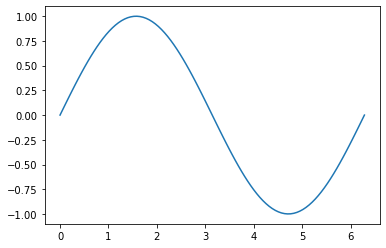

In [46]:
# Plot sin_result

plt.plot(pi_tensor.numpy(), sin_result.numpy())

<h3>Quiz</h3>

Construct a tensor with 25 steps in the range 0 to π/2. Print out the Maximum and Minimum number. 

<h2 id="Tensor_Op">Tensor Operations on 1-D tensors</h2>
In the following section, you'll work with operations that you can apply to a tensor.

<h3>Tensor Addition</h3>
You can perform addition between two tensors.

Create a tensor <code>u</code> with 1 dimension and 2 elements. Then, create another tensor <code>v</code> with the same number of dimensions and the same number of elements:

In [54]:
# Create two sample tensors

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])
# Add u and v

w = u + v
print("The result tensor: ", w)

The result tensor:  tensor([1, 1])


Plot the result to to get a clearer picture.

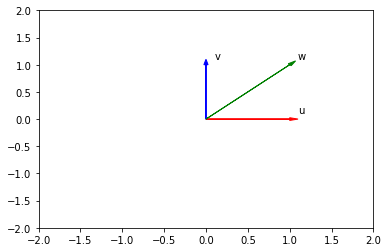

In [55]:
# Plot u, v, w

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

<h3>Quiz</h3> 
Implement the tensor subtraction with <code>u</code> and <code>v</code> as u-v, and plot it.

In [ ]:
u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

You can add a scalar to the tensor. Use <code>u</code> as the sample tensor:

In [58]:
# tensor + scalar

u = torch.tensor([1, 2, 3, -1])
v = u + 1
print ("Addition Result: ", v)

Addition Result:  tensor([2, 3, 4, 0])


<h3>Tensor Multiplication </h3>
Now, you'll review the multiplication between a tensor and a scalar.

Create a tensor with value <code>[1, 2]</code> and then multiply it by 2:

In [59]:
# tensor * scalar

u = torch.tensor([1, 2])
v = 2 * u
print("The result of 2 * u: ", v)

The result of 2 * u:  tensor([2, 4])


The result is <code>tensor([2, 4])</code>, so the code <code>2 * u</code> multiplies each element in the tensor by 2. This is how you get the product between a vector or matrix and a scalar in linear algebra.

You can use multiplication between two tensors.

Create two tensors <code>u</code> and <code>v</code> and then multiply them together:

In [60]:
# tensor * tensor

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v
print ("The result of u * v", w)

The result of u * v tensor([3, 4])


The result is simply <code>tensor([3, 4])</code>. This result is achieved by multiplying every element in <code>u</code> with the corresponding element in the same position <code>v</code>, which is similar to <i>[1 * 3, 2 * 2]</i>.

<h3>Dot Product</h3>
The dot product is a special operation for a vector that you can use in Torch.

Here is the dot product of the two tensors <code>u</code> and <code>v</code>:

In [61]:
# Calculate dot product of u, v

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)


The result is <code>tensor(7)</code>. The function is <i>1 x 3 + 2 x 2 = 7</i>.

<h3>Quiz</h3>

The dot product =  tensor(0)


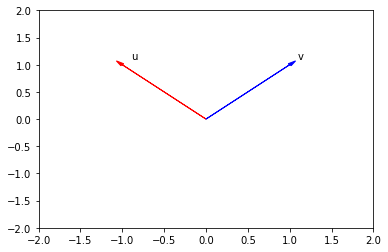

In [65]:
# Type your code here
u = torch.tensor([-1,1])
v = torch.tensor([1,1])
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'}
])
print("The dot product = " , torch.dot(u,v))

<h2 id="Types_Shape">Types and Shape of 2-D tensors</h2>

Let us see how to convert a 2D list to a 2D tensor. First, let us create a 3X3 2D tensor. Then let us try to use <code>torch.tensor()</code> which we used for converting a 1D list to 1D tensor. Is it going to work?

In [66]:
# Convert 2D List to 2D Tensor

twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The New 2D Tensor: ", twoD_tensor)

The New 2D Tensor:  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


Let us try <code><i>tensor_obj</i>.ndimension()</code> (<code>tensor_obj</code>: This can be any tensor object), <code><i>tensor_obj</i>.shape</code>, and <code><i>tensor_obj</i>.size()</code>

In [67]:
# Try tensor_obj.ndimension(), tensor_obj.shape, tensor_obj.size()

print("The dimension of twoD_tensor: ", twoD_tensor.ndimension())
print("The shape of twoD_tensor: ", twoD_tensor.shape)
print("The shape of twoD_tensor: ", twoD_tensor.size())

The dimension of twoD_tensor:  2
The shape of twoD_tensor:  torch.Size([3, 3])
The shape of twoD_tensor:  torch.Size([3, 3])


Now, let us try converting the tensor to a numpy array and convert the numpy array back to a tensor.

In [68]:
# Convert tensor to numpy array; Convert numpy array to tensor

twoD_numpy = twoD_tensor.numpy()
print("Tensor -> Numpy Array:")
print("The numpy array after converting: ", twoD_numpy)
print("Type after converting: ", twoD_numpy.dtype)

print("================================================")

new_twoD_tensor = torch.from_numpy(twoD_numpy)
print("Numpy Array -> Tensor:")
print("The tensor after converting:", new_twoD_tensor)
print("Type after converting: ", new_twoD_tensor.dtype)

Tensor -> Numpy Array:
The numpy array after converting:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64
Numpy Array -> Tensor:
The tensor after converting: tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64


Now let us try to convert a Pandas Dataframe to a tensor. The process is the  Same as the 1D conversion, we can obtain the numpy array via the attribute <code>values</code>. Then, we can use <code>torch.from_numpy()</code> to convert the value of the Pandas Series to a tensor.

In [69]:
# Try to convert the Panda Dataframe to tensor

df = pd.DataFrame({'a':[11,21,31],'b':[12,22,312]})

print("Pandas Dataframe to numpy: ", df.values)
print("Type BEFORE converting: ", df.values.dtype)

print("================================================")

new_tensor = torch.from_numpy(df.values)
print("Tensor AFTER converting: ", new_tensor)
print("Type AFTER converting: ", new_tensor.dtype)

Pandas Dataframe to numpy:  [[ 11  12]
 [ 21  22]
 [ 31 312]]
Type BEFORE converting:  int64
Tensor AFTER converting:  tensor([[ 11,  12],
        [ 21,  22],
        [ 31, 312]])
Type AFTER converting:  torch.int64


<h3>Quiz</h3>
Try to convert the following Pandas Dataframe  to a tensor

In [71]:
# Practice: try to convert Pandas Series to tensor

df = pd.DataFrame({'A':[11, 33, 22],'B':[3, 3, 2]})

<h2 id="Index_Slice">Indexing and Slicing of 2D-tensors</h2>
You can use rectangular brackets to access the different elements of the tensor. Now, let us try to access the value on position 2nd-row 3rd-column. Remember that the index is always 1 less than how we count rows and columns. There are two ways to access the certain value of a tensor. The example in code will be the same as the example picture above.

In [75]:
# Use tensor_obj[row, column] and tensor_obj[row][column] to access certain position

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1, 2])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1][2])

What is the value on 2nd-row 3rd-column?  tensor(23)
What is the value on 2nd-row 3rd-column?  tensor(23)


What if we want to get the value on both 1st-row 1st-column and 1st-row 2nd-column? You can also use slicing in a tensor.

As we can see, both methods return the true value (the same value as the picture above). Therefore, both of the methods work.

In [ ]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 
# and tensor_obj[row][begin_column_number: end_column number] to do the slicing

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 1st-row first two columns? ", tensor_example[0, 0:2])
print("What is the value on 1st-row first two columns? ", tensor_example[0][0:2])

We get the result as <code>tensor([11, 12])</code> successfully.

But we <b>can't</b> combine using slicing on row and pick one column by using the code <code>tensor_obj[begin_row_number: end_row_number][begin_column_number: end_column number]</code>. The reason is that the slicing will be applied on the tensor first. The result type will be a two dimension again. The second bracket will no longer represent the index of the column it will be the index of the row at that time. Let us see an example. 

In [ ]:
# Give an idea on tensor_obj[number: number][number]

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
sliced_tensor_example = tensor_example[1:3]
print("1. Slicing step on tensor_example: ")
print("Result after tensor_example[1:3]: ", sliced_tensor_example)
print("Dimension after tensor_example[1:3]: ", sliced_tensor_example.ndimension())
print("================================================")
print("2. Pick an index on sliced_tensor_example: ")
print("Result after sliced_tensor_example[1]: ", sliced_tensor_example[1])
print("Dimension after sliced_tensor_example[1]: ", sliced_tensor_example[1].ndimension())
print("================================================")
print("3. Combine these step together:")
print("Result: ", tensor_example[1:3][1])
print("Dimension: ", tensor_example[1:3][1].ndimension())

See the results and dimensions in 2 and 3 are the same. Both of them contains the 3rd row in the <code>tensor_example</code>, but not the last two values in the 3rd column.

So how can we get the elements in the 3rd column with the last two rows? 

In [ ]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 3rd-column last two rows? ", tensor_example[1:3, 2])

Fortunately, the code <code>tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number]</code> is still works.

<h3>Quiz</h3>
Try to change the values on the second column and the last two rows to 0. Basically, change the values on <code>tensor_ques[1][1]</code> and <code>tensor_ques[2][1]</code> to 0.

In [ ]:
# Practice: Use slice and index to change the values on the matrix tensor_ques.

tensor_ques = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])


<h2 id="Tensor_Op">Operations on 2D-tensors</h2> 

<h3>Tensor Addition</h3>
You can also add tensors; the process is identical to matrix addition. Matrix addition of <b>X</b> and <b>Y</b> is shown in the following figure:

In [ ]:
# Calculate [[1, 0], [0, 1]] + [[2, 1], [1, 2]]

X = torch.tensor([[1, 0],[0, 1]]) 
Y = torch.tensor([[2, 1],[1, 2]])
X_plus_Y = X + Y
print("The result of X + Y: ", X_plus_Y)

<h3> Scalar Multiplication </h3>

Multiplying a tensor by a scalar is identical to multiplying a matrix by a scaler. If you multiply the matrix <b>Y</b> by the scalar 2, you simply multiply every element in the matrix by 2.

In [ ]:
# Calculate 2 * [[2, 1], [1, 2]]

Y = torch.tensor([[2, 1], [1, 2]]) 
two_Y = 2 * Y
print("The result of 2Y: ", two_Y)

<h3>Element-wise Product</h3>

Multiplication of two tensors corresponds to an element-wise product or Hadamard product.  Consider matrix the <b>X</b> and <b>Y</b> with the same size. The Hadamard product corresponds to multiplying each of the elements at the same position, that is, multiplying elements with the same color together. The result is a new matrix that is the same size as matrix <b>X</b> and <b>Y</b>.

In [ ]:
# Calculate [[1, 0], [0, 1]] * [[2, 1], [1, 2]]

X = torch.tensor([[1, 0], [0, 1]])
Y = torch.tensor([[2, 1], [1, 2]]) 
X_times_Y = X * Y
print("The result of X * Y: ", X_times_Y)

<h3>Matrix Multiplication </h3>

We can also apply matrix multiplication to two tensors, if you have learned linear algebra, you should know that in the multiplication of two matrices order matters. This means if <i>X * Y</i> is valid, it does not mean <i>Y * X</i> is valid. The number of columns of the matrix on the left side of the multiplication sign must equal to the number of rows of the matrix on the right side.

First, let us create a tensor <code>X</code> with size 2X3. Then, let us create another tensor <code>Y</code> with size 3X2. Since the number of columns of <code>X</code> is equal to the number of rows of <code>Y</code>. We are able to perform the multiplication.

We use <code>torch.mm()</code> for calculating the multiplication between tensors with different sizes.

In [ ]:
# Calculate [[0, 1, 1], [1, 0, 1]] * [[1, 1], [1, 1], [-1, 1]]

A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])
A_times_B = torch.mm(A,B)
print("The result of A * B: ", A_times_B)

<h3>Practice</h3>

Try to create your own two tensors (<code>X</code> and <code>Y</code>) with different sizes, and multiply them.

In [ ]:
# Type your code here

<hr/>
<i>Credits: Parts of this lab was derived from the Jupyter Notebooks available at <a href="https://cognitiveclass.ai/mit-license">cognitiveclass.ai</a>. As the original notebook, this notebok is also licensed under an MIT License.</i>